In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle  # pip install pywaffle

%matplotlib inline

ModuleNotFoundError: No module named 'pywaffle'

In [3]:
installs = pd.read_csv('data/installs.csv.gzip', compression = 'gzip')

## **Analisis inicial**

In [4]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [5]:
len(installs)

3412

In [6]:
installs.isnull().sum()
# click_hash, device_brand, user_agent (1/2 nulls), event_uuid, kind, wifi (1/2 nulls), trans_id son casi todos Null #

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [7]:
installs['attributed'].value_counts()
# Todos los valores son False, no aporta informacion relevante #

False    3412
Name: attributed, dtype: int64

## 1 - Cantitad de installs por tipo

In [8]:
installs.kind.unique()

array([nan, 'Open', 'open', 'registration', 'app_open',
       'EVENT_LISTINGVIEW_FLIGHT', 'EVENT_Homepage', 'EVENT_OPEN_APP',
       'af_app_opened', 'deeplink', 'EVENT_PROMO', 'EVENT_HOMEPAGE',
       'af_list_view', 'install', 'journey first drop off',
       'reattribution', 'journey reserved', 'journey drop off',
       'account_summary_first_step', 'login_success',
       'payment method add'], dtype=object)

In [9]:
kinds = installs.groupby('kind').agg({'kind':'count'})

In [10]:
kinds = kinds.rename(index=str, columns={"kind":"kind_count","index":"kind"})
kinds = kinds.sort_values('kind_count', ascending=False)

Me quedo unicamente con los tipos de instalacion que sucedieron mas de 10 veces

In [11]:
kinds = kinds.loc[(kinds['kind_count'] > 10), ['kind_count']]

In [12]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20,
    figsize=(14, 8),
    values=kinds.kind_count,
    labels=list(kinds.index),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1.02)}
)

NameError: name 'Waffle' is not defined

## 2 - Cantidad de installs por device brand

In [13]:
installs_graficable = installs.groupby('device_brand').agg({'device_brand':'count'})
installs_graficable.columns= ['count_installs']

In [14]:
installs_graficable = installs_graficable.sort_values(by=['count_installs'],ascending=False)
installs_graficable = installs_graficable.head(10)
installs_graficable['Alias'] = ['A','C','E','X','D','B','F','I','G','J']
installs_graficable = installs_graficable.sort_values('Alias')

### Los alias son los mismos que en events

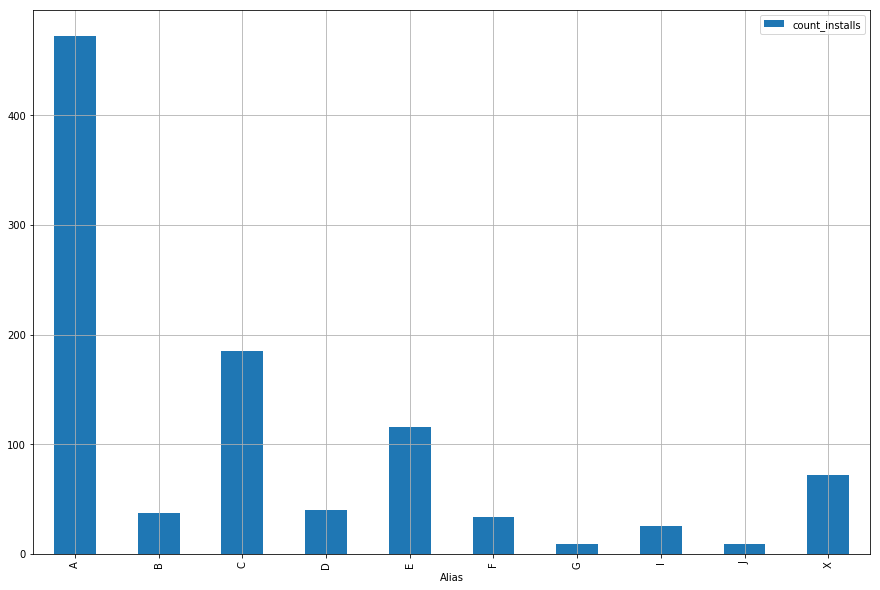

In [15]:
grph2 = installs_graficable.plot.bar(grid = True, x='Alias',figsize = (15,10))

### 3.083059e+17	A
### 3.812621e+18	B
### 2.208835e+18	C
### 2.987569e+18	D
### 2.523246e+18	E
### 5.137992e+17	F
### 3.228516e+18	G
### 6.538562e+18	I
### 1.083369e+18	J
### 5.951325e+18	X

## 3 - Comparacion de events e installs por device brand

In [16]:
events = pd.read_csv('data/events.csv.gzip', compression='gzip', low_memory = False)
events_graficable = events.groupby('device_brand').agg({'device_brand':'count'})
events_graficable.columns= ['cantidad_eventos']

In [17]:
events_graficable = events_graficable.sort_values(by=['cantidad_eventos'],ascending=False)
events_graficable = events_graficable.head(10)
events_graficable['Alias'] = ['A','B','C','D','E','F','G','H','I','J']

In [18]:
merged = events_graficable.merge(installs_graficable, on = 'device_brand', how = 'outer')

In [19]:
merged = merged[['cantidad_eventos','count_installs','Alias_x']]
merged.reset_index(inplace = True)

In [20]:
merged.loc[10, 'Alias_x'] = 'X'

In [21]:
merged

,device_brand,cantidad_eventos,count_installs,Alias_x
0,3.083059e+17,579861.0,472.0,A
1,3.812621e+18,115538.0,37.0,B
2,2.208835e+18,113636.0,185.0,C
3,2.987569e+18,107472.0,40.0,D
4,2.523246e+18,94672.0,116.0,E
5,5.137992e+17,39432.0,34.0,F
6,3.228516e+18,15589.0,9.0,G
7,2.262848e+18,12325.0,NaN,H
8,6.538562e+18,11839.0,26.0,I
9,1.083369e+18,9667.0,9.0,J


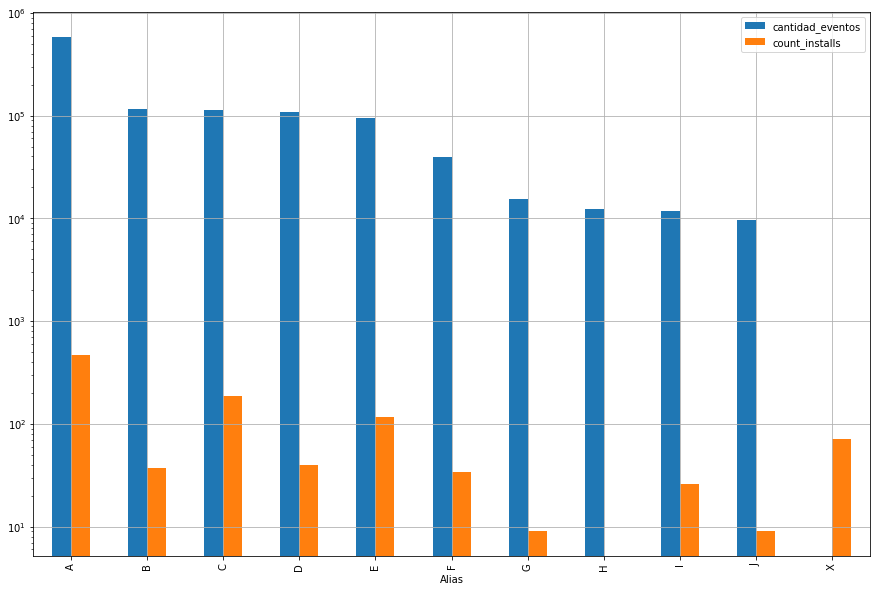

In [22]:
grph3 = merged.loc[:,['cantidad_eventos','count_installs', 'Alias_x']].plot.bar(grid = True, x='Alias_x',figsize = (15,10))
grph3.set_yscale('log')
grph3.set_xlabel('Alias');

Se puede ver que la marca A es la que mas interacciones totales tuvo. El resto de los installs son bastante parejos por lo que la informacion acerca de los events sigue siendo mas relevante para cada caso.

## 4 - Comparacion de instalaciones: hechas con o sin wifi

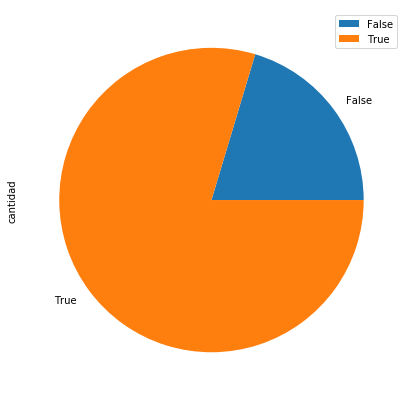

In [59]:
graph4 = installs.groupby('wifi').agg({'wifi':'count'})
graph4.columns = ['cantidad']
graph4 = graph4.plot.pie('cantidad', figsize = (7,7))

Se puede ver que la mayoría de las instalaciones fueron realizadas utilizando wifi.

## 5 - Idioma de los dispositivos

/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'device_language' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


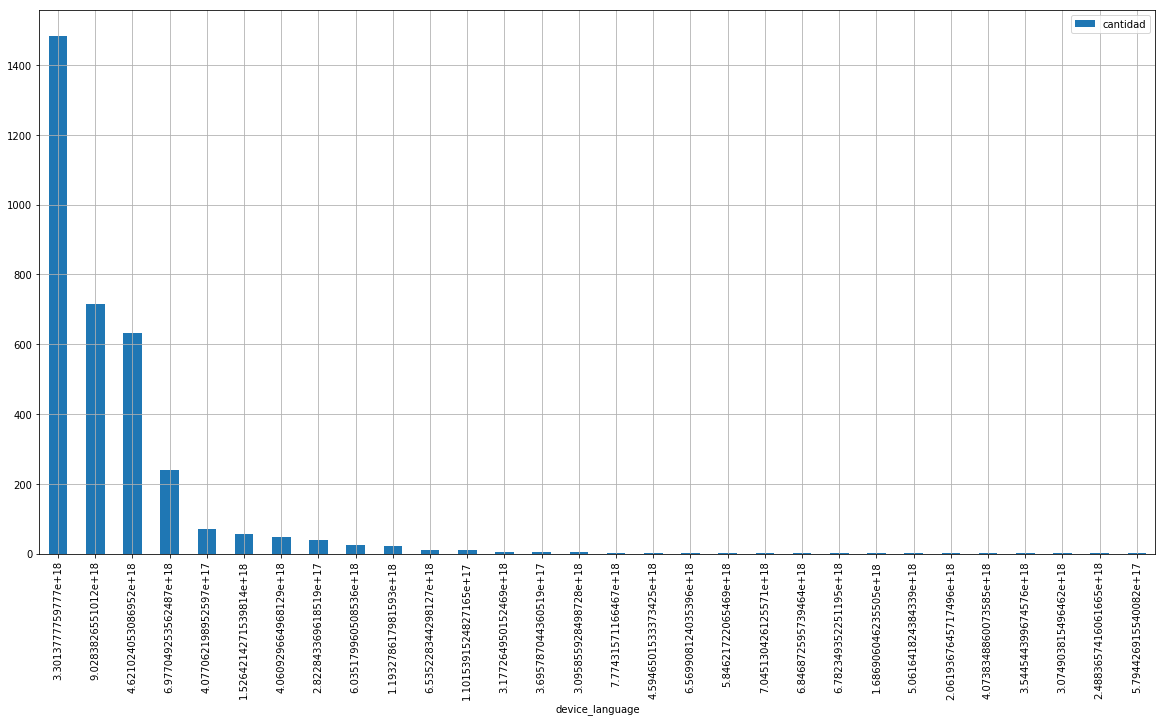

In [108]:
graph5 = installs.groupby('device_language').agg({'device_language':'count'}).sort_values(by = 'device_language',ascending = False)
graph5.columns = ['cantidad']
graph5 = graph5.plot.bar(grid = True, figsize = (20,10))

Se puede ver que hay un idioma predominante.